In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/largest-companies-in-the-united-states-by-revenue/LargestCompaniesInUSAbyReveneue.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Dataset

In [3]:
# making 'rank' column as row labels
df = pd.read_csv('/kaggle/input/largest-companies-in-the-united-states-by-revenue/LargestCompaniesInUSAbyReveneue.csv',index_col=0)
df.head()

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"


## Data Formatting

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    100 non-null    object
 1   Industry                100 non-null    object
 2   Revenue (USD millions)  100 non-null    object
 3   Revenue growth          100 non-null    object
 4   Employees               100 non-null    object
 5   Headquarters            100 non-null    object
dtypes: object(6)
memory usage: 5.5+ KB


**Transforming Data**

In [5]:
# Removing commas from 'Revenue(USD millions)'
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','')
df['Employees'] = df['Employees'].str.replace(',','')

In [6]:
df['Revenue growth(%)'] = df['Revenue growth'].str.replace('%','')
df.drop(columns ='Revenue growth',inplace = True )

In [7]:
df[['Revenue (USD millions)','Revenue growth(%)']] = df[['Revenue (USD millions)','Revenue growth(%)']].astype('float')
df['Employees'] = df['Employees'].astype('int')

**Expanding Headquarters column**

In [8]:
expand_one  = df['Headquarters'].str.split(',',expand = True)
print(expand_one)

                        0                1     2
Rank                                            
1             Bentonville         Arkansas  None
2                 Seattle       Washington  None
3               Cupertino       California  None
4              Woonsocket     Rhode Island  None
5              Minnetonka        Minnesota  None
...                   ...              ...   ...
96                 Reston         Virginia  None
97    Inver Grove Heights        Minnesota  None
98            San Antonio            Texas  None
99              Milwaukee        Wisconsin  None
100             Charlotte   North Carolina  None

[100 rows x 3 columns]


In [9]:
# Checking for column 2
col2_unique = expand_one[2].unique() # Always use unique it will also show if there are any whitespaces.
print(col2_unique)

[None ' Illinois']


In [10]:
expand_one[expand_one[2]==' Illinois']

,0,1,2
Rank,,,
66,Northfield Township,Cook County,Illinois


In [11]:
# Setting required values
expand_one.at[66,0] = 'Cook County'
expand_one.at[66,1] = 'Illinois'

In [12]:
# Dropping column 2 because there is only one row with value in column 2
expand_one.drop(columns=2, axis =1 , inplace = True)

In [13]:
expand_one.head()

,0,1
Rank,,
1,Bentonville,Arkansas
2,Seattle,Washington
3,Cupertino,California
4,Woonsocket,Rhode Island
5,Minnetonka,Minnesota


In [14]:
df[['place_name','state']] = expand_one

In [15]:
# Dropping column 'headquarters'
df.drop(columns = 'Headquarters', inplace = True)

In [16]:
df.head()

,Name,Industry,Revenue (USD millions),Employees,Revenue growth(%),place_name,state
Rank,,,,,,,
1,Walmart,General merchandisers,572754.0,2300000,2.4,Bentonville,Arkansas
2,Amazon,Retail and Cloud Computing,469822.0,1608000,21.7,Seattle,Washington
3,Apple,Electronics industry,365817.0,154000,33.2,Cupertino,California
4,CVS Health,Healthcare,292111.0,258000,32.0,Woonsocket,Rhode Island
5,UnitedHealth Group,Healthcare,287597.0,350000,11.8,Minnetonka,Minnesota


## Analyzing Data

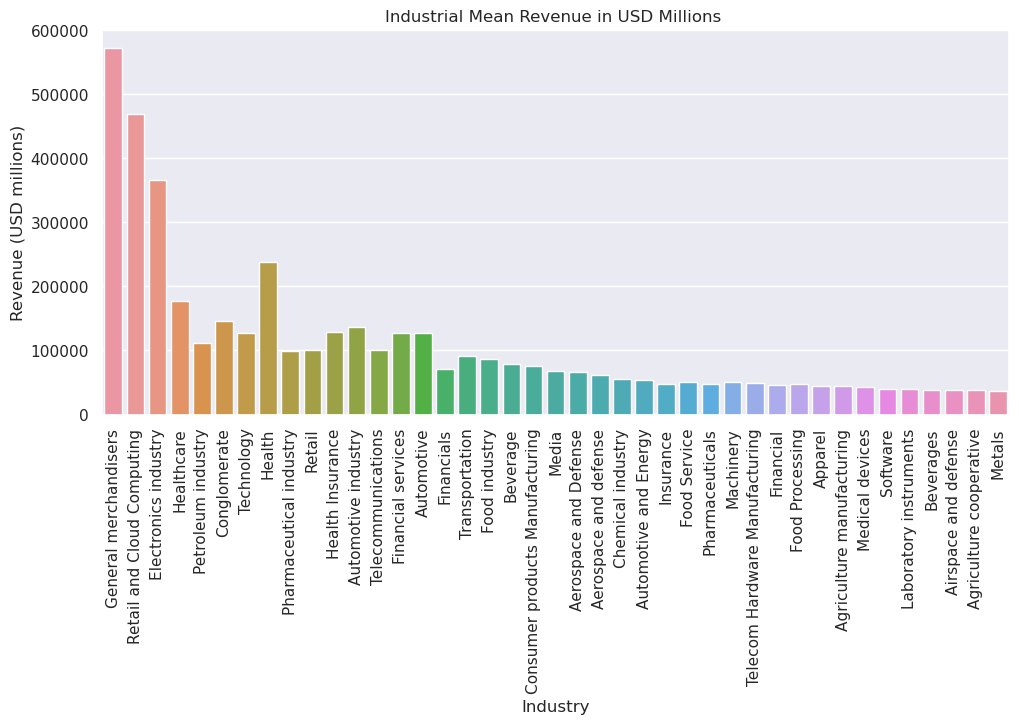

In [17]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.barplot(data = df, x ='Industry',y='Revenue (USD millions)',errorbar = None)
g.set_title('Industrial Mean Revenue in USD Millions ')
plt.xticks(rotation = 90)
plt.show()

<h3> Observation 1: </h3>
<h4> General Merchandisers, Retail and Cloud Computing, Electronics Industry,Health are top earning industries. </h4>

In [18]:
df['revenue_per_employee_company'] = df['Revenue (USD millions)']/ df['Employees']
df_revenue = df.sort_values('revenue_per_employee_company',ascending = False)

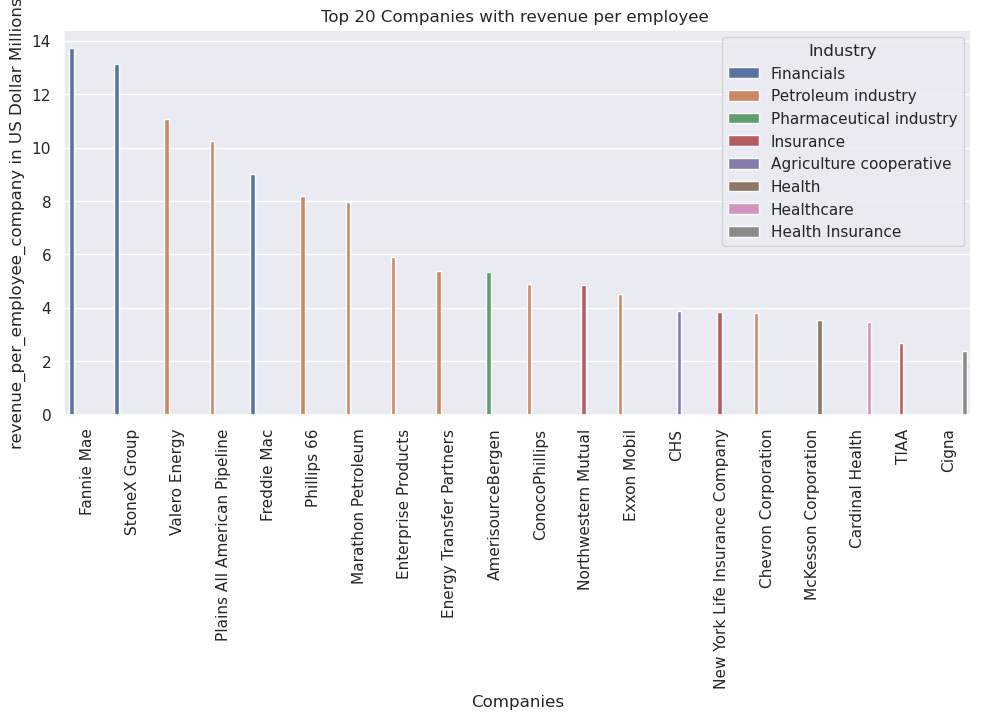

In [19]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.barplot(data = df_revenue.iloc[0:20], x = 'Name',y='revenue_per_employee_company',errorbar = None,hue = 'Industry')
g.set_title('Top 20 Companies with revenue per employee ')
g.set(xlabel = 'Companies',ylabel = 'revenue_per_employee_company in US Dollar Millions')
plt.xticks(rotation = 90)
plt.show()

<h3> Observation 2: </h3>
<h4> Fannie Mae, Stonex Group, Valero Energy are some of the top companies with revenue per employee.</h4>

In [20]:
revenue_per_employee_industry = df.groupby('Industry')[['Revenue (USD millions)', 'Employees']].agg(np.sum)
revenue_per_employee_industry.head()

,Revenue (USD millions),Employees
Industry,,
Aerospace and Defense,67044.0,114000
Aerospace and defense,62286.0,142000
Agriculture cooperative,38448.0,9941
Agriculture manufacturing,44024.0,75550
Airspace and defense,38469.0,103100


In [21]:
revenue_per_employee_industry['RPE'] = revenue_per_employee_industry['Revenue (USD millions)']/ revenue_per_employee_industry['Employees']
revenue_per_employee_industry.reset_index(inplace = True)
revenue_per_employee_industry.sort_values('RPE',ascending = False,inplace = True)

In [22]:
revenue_per_employee_industry.head()

,Industry,Revenue (USD millions),Employees,RPE
31,Petroleum industry,1010973.0,180568,5.598849
2,Agriculture cooperative,38448.0,9941,3.867619
22,Health,238228.0,67500,3.529304
14,Electronics industry,365817.0,154000,2.375435
20,Food industry,85959.0,39979,2.150104


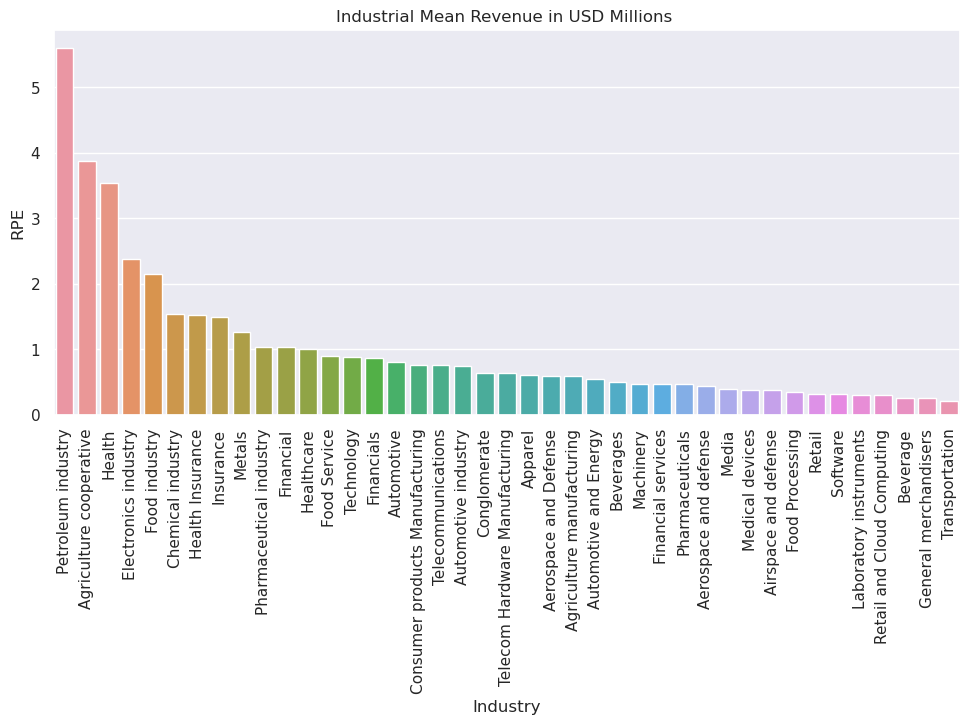

In [23]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.barplot(data = revenue_per_employee_industry, x ='Industry',y='RPE',errorbar = None)
g.set_title('Industrial Mean Revenue in USD Millions ')
plt.xticks(rotation = 90)
plt.show()

<h3> Observation 3: </h3>
<h4> Petrolium Industry, Agriculture cooperative, Health, Electronics Industry, Food Industry are top industries with revenue per employee. </h4>